In [ ]:
# ============================================
# 1) IMPORT & BASIC SETUP
# ============================================

In [ ]:
!pip install -U "scikit-learn>=1.4.2" "scikeras>=0.13.0"

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import math
from joblib import Parallel, delayed
import PIL
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kagglehub
!pip install scikeras

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd        524           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       3100           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           100,000 Usd        254           False  
https://www.kaggle.com/competitions/google-tunix-hackathon                          2026-01-12 23:59:00  Featured           100,000 Usd         72           False  
https://ww

In [ ]:
# ลองเช็คว่า login ได้
!kaggle competitions list | head

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd        524           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       3100           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           100,000 Usd        254           False  
https://www.kaggle.com/competitions/google-tunix-hackathon                          2026-01-12 23:59:00  Featured           100,000 Usd         72           False  
https://ww

In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashion-product-images-dataset' dataset.
Path to dataset files: /kaggle/input/fashion-product-images-dataset


In [ ]:
import os

print("Path =", path)
!ls $path
!ls $path/fashion-dataset | head

Path = /kaggle/input/fashion-product-images-dataset
fashion-dataset
fashion-dataset
images
images.csv
styles
styles.csv


In [ ]:
csv_path = os.path.join(path, "fashion-dataset", "styles.csv")
images_dir = os.path.join(path, "fashion-dataset", "images")

In [ ]:
print("CSV exists:", os.path.exists(csv_path))
print("Images dir exists:", os.path.exists(images_dir))

CSV exists: True
Images dir exists: True


In [ ]:
# ============================================
# 4) LOAD CSV + เลือกเฉพาะ 5 classes (Topwear, Shoes, Bottomwear, Bags, Watches)
# ============================================

In [ ]:
styles = pd.read_csv(csv_path, on_bad_lines='skip')
print("Raw styles shape:", styles.shape)
styles.head()

Raw styles shape: (44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
# ดู distribution คร่าว ๆ ก่อน
styles['subCategory'].value_counts().head(20)

,count
subCategory,
Topwear,15402
Shoes,7343
Bags,3055
Bottomwear,2694
Watches,2542
Innerwear,1808
Jewellery,1079
Eyewear,1073
Fragrance,1011


In [ ]:
# เลือกเฉพาะ 5 class
target_classes = ['Topwear', 'Shoes', 'Bottomwear', 'Bags', 'Watches']

styles_small = styles[styles['subCategory'].isin(target_classes)].reset_index(drop=True)
print("After filtering 5 classes:", styles_small.shape)
styles_small['subCategory'].value_counts()


After filtering 5 classes: (31036, 10)


,count
subCategory,
Topwear,15402
Shoes,7343
Bags,3055
Bottomwear,2694
Watches,2542


In [ ]:
# ============================================
# 5) BALANCE DATA: sample N_PER_CLASS ต่อ class
# ============================================

In [ ]:
N_PER_CLASS = 1000

styles_small = (
    styles_small
    .groupby('subCategory', group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=101))
    .reset_index(drop=True)
)


In [ ]:
print("After sampling per class:")
print(styles_small['subCategory'].value_counts())
print("Total:", len(styles_small))

After sampling per class:
subCategory
Bags          1000
Bottomwear    1000
Shoes         1000
Topwear       1000
Watches       1000
Name: count, dtype: int64
Total: 5000


In [ ]:
# ============================================
# 6) ENCODE LABEL + TRAIN/VAL/TEST SPLIT
# ============================================

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
styles_small['label'] = encoder.fit_transform(styles_small['subCategory'])

print("Class mapping:", dict(enumerate(encoder.classes_)))


Class mapping: {0: 'Bags', 1: 'Bottomwear', 2: 'Shoes', 3: 'Topwear', 4: 'Watches'}


In [ ]:

train_df, test_df = train_test_split(
    styles_small,
    test_size=0.2,
    stratify=styles_small['label'],
    random_state=101
)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df['label'],
    random_state=101
)


In [ ]:
print("Train/Val/Test sizes:", len(train_df), len(val_df), len(test_df))

Train/Val/Test sizes: 3200 800 1000


In [ ]:
# ============================================
# 7) IMAGE LOADING FUNCTION (28x28 grayscale + normalize + flatten)
# ============================================

In [ ]:
image_size = (28, 28)

def load_img_flat(img_id, size=image_size):
    path_img = os.path.join(images_dir, f"{int(img_id)}.jpg")
    if not os.path.exists(path_img):
        return None
    img = Image.open(path_img).convert("L").resize(size)  # grayscale + resize
    arr = np.array(img).astype("float32") / 255.0         # normalize 0-1
    return arr.reshape(-1)  # flatten เป็น vector 28*28 = 784

def build_Xy(df_part):
    X_list, y_list = [], []
    for _, row in df_part.iterrows():
        vec = load_img_flat(row['id'])
        if vec is None:
            continue
        X_list.append(vec)
        y_list.append(row['label'])
    X = np.stack(X_list)
    y = np.array(y_list)
    return X, y

In [ ]:
X_train, y_train = build_Xy(train_df)
X_val,   y_val   = build_Xy(val_df)
X_test,  y_test  = build_Xy(test_df)

X_train.shape, X_val.shape, X_test.shape


((3199, 784), (800, 784), (1000, 784))

In [ ]:
# ============================================
# 8) รวม TRAIN + VAL สำหรับใช้ K-FOLD
# ============================================

In [ ]:
X_train_full = np.concatenate([X_train, X_val], axis=0)
y_train_full = np.concatenate([y_train, y_val], axis=0)

print("Train full shape:", X_train_full.shape, y_train_full.shape)

Train full shape: (3999, 784) (3999,)


In [ ]:
# ============================================
# 9) DEFINE MLP MODEL FUNCTION (สำหรับ KerasClassifier / GridSearchCV)
# ============================================

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = X_train.shape[1]  # 784
num_classes = len(encoder.classes_)

def create_mlp(num_hidden1=256, num_hidden2=128, dropout_rate=0.3, optimizer="adam"):
    model = Sequential([
        Dense(num_hidden1, activation='relu', input_shape=(input_dim,)),
        Dropout(dropout_rate),
        Dense(num_hidden2, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:

tmp_model = create_mlp()
tmp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,501 (916.02 KB)

 Trainable params: 234,501 (916.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============================================
# 10) GRIDSEARCHCV + STRATIFIED K-FOLD
# ============================================

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import tensorflow as tf
tf.random.set_seed(1)


# ห่อ Keras model ด้วย KerasClassifier
clf = KerasClassifier(
    model=create_mlp,
    verbose=0,
    random_state=101
)

# Stratified K-Fold (รักษาสัดส่วน class ในแต่ละ fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=101)

# กำหนด parameter grid ที่อยากลอง
param_grid = {
    "model__num_hidden1": [128, 256],
    "model__num_hidden2": [64, 128],
    "model__dropout_rate": [0.3, 0.5],
    "epochs": [10, 15],
    "batch_size": [32, 64]
}

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)


In [ ]:
print(">>> Start GridSearchCV ...")
grid_result = grid.fit(X_train_full, y_train_full)
print(">>> GridSearchCV DONE.")

print("Best CV accuracy: ", grid_result.best_score_)
print("Best params: ", grid_result.best_params_)


>>> Start GridSearchCV ...
>>> GridSearchCV DONE.
Best CV accuracy:  0.9372343085771444
Best params:  {'batch_size': 64, 'epochs': 15, 'model__dropout_rate': 0.3, 'model__num_hidden1': 256, 'model__num_hidden2': 128}


In [ ]:
# ============================================
# EXTRA: Train best model again to record history (for loss/accuracy plots)
# ============================================
best_params = grid_result.best_params_
print("Best params (for re-training):", best_params)


num_hidden1  = best_params["model__num_hidden1"]
num_hidden2  = best_params["model__num_hidden2"]
dropout_rate = best_params["model__dropout_rate"]
best_epochs  = best_params["epochs"]
best_batch   = best_params["batch_size"]
best_optimizer = best_params.get("model__optimizer", "adam")


best_model_for_plot = create_mlp(
    num_hidden1=num_hidden1,
    num_hidden2=num_hidden2,
    dropout_rate=dropout_rate,
    optimizer=best_optimizer
)


history = best_model_for_plot.fit(
    X_train_full, y_train_full,
    epochs=best_epochs,
    batch_size=best_batch,
    validation_split=0.1,
    verbose=1
)


Best params (for re-training): {'batch_size': 64, 'epochs': 15, 'model__dropout_rate': 0.3, 'model__num_hidden1': 256, 'model__num_hidden2': 128}
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4203 - loss: 1.4923 - val_accuracy: 0.8500 - val_loss: 0.5413
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8202 - loss: 0.5365 - val_accuracy: 0.8975 - val_loss: 0.3478
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8719 - loss: 0.3819 - val_accuracy: 0.8825 - val_loss: 0.3277
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8834 - loss: 0.3389 - val_accuracy: 0.9050 - val_loss: 0.2777
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8990 - loss: 0.2956 - val_accuracy: 0.9125 - val_loss: 0.2620
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2955 - val_accuracy: 0.8975 - val_loss: 0.2886
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9046 - loss: 0.2799 - val_accurac

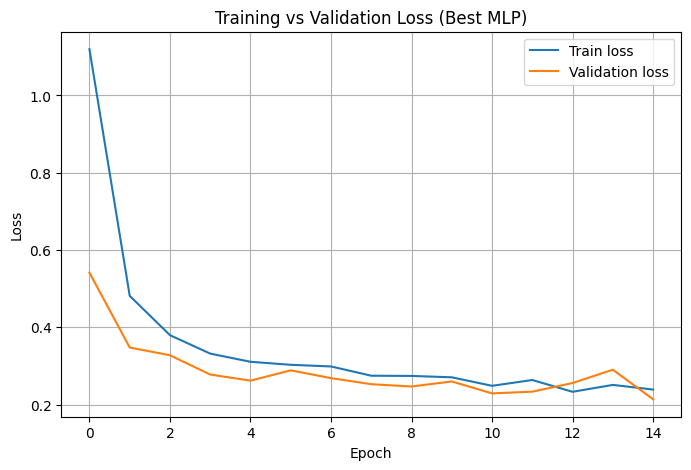

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Best MLP)')
plt.legend()
plt.grid(True)
plt.show()


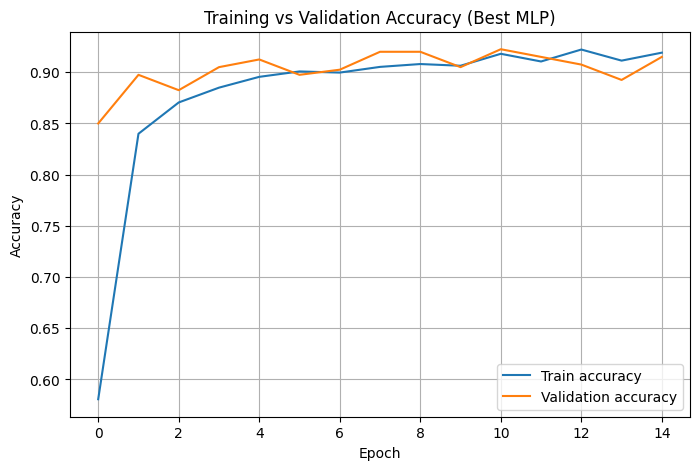

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Best MLP)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ============================================
# 11) EVALUATE BEST MODEL บน TEST SET
# ============================================
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# ดึง best estimator ออกมา
best_clf = grid_result.best_estimator_

# ใช้ predict บน test set (จะได้ label ตรง ๆ)
y_pred = best_clf.predict(X_test)

print("=== Test Classification Report (Best MLP from GridSearch) ===")
print(classification_report(
    y_test,
    y_pred,
    target_names=encoder.classes_
))

=== Test Classification Report (Best MLP from GridSearch) ===
              precision    recall  f1-score   support

        Bags       0.96      0.93      0.95       200
  Bottomwear       0.74      0.94      0.83       200
       Shoes       0.98      0.94      0.96       200
     Topwear       0.98      0.89      0.93       200
     Watches       0.95      0.84      0.89       200

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



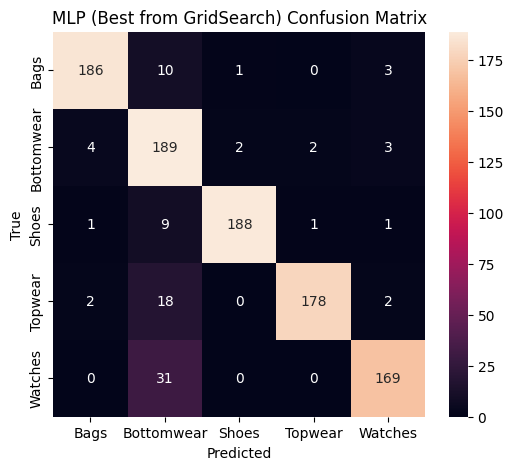

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MLP (Best from GridSearch) Confusion Matrix")
plt.show()

In [ ]:
# Accuracy + Macro F1
test_acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy : {test_acc:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")


Test Accuracy : 0.9100
Macro F1-score: 0.9128
